In [52]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"


<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_portada.jpg" align="center" width="70%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 6</div>
            <div class="div-contenido">Series de Tiempo 2

</div>
        </div>
    </div>
</div>

### Agenda

---
   - Series Estacionarias.
      - Componentes.
      - Diferenciación
      - Test de Dickey-Fuller Aumentado (ADF)
---      
   - ARIMA.
      - Modelo Auto-Regresivo AR(p)
      - Modelo de Media Movil MA(q)
      - Modelo ARIMA sin estacionalidad
      - Estimación parámetros p y q


<div class="div-dhds-fondo-1"> Introducción
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Introducción

---

En esta clase vamos a trabajar con la **componente cíclica** de las series de tiempo. 

Recordemos la descomposición de una serie de tiempo:

$$ y_t = T_t + S_t + C_t + \varepsilon_t. $$

donde T es la tendencia, S es la estacionalidad, C es el ciclo y $ \varepsilon $ es el error aleatorio.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_48_Series_de_Tiempo_1/Presentacion/img/M6_CLASE_48_002_componentes.jpg" alt="componentes" width=50% height=30% align="center"/>

Por **ciclo** se entiende cualquier tipo de dinámica *no capturada por la tendencia o la estacionalidad*.

Estamos ante la presencia de ciclos cuando observamos algún tipo de dinámica que *vincula al presente con el pasado*. No tiene por qué ser un ciclo rígido.

Los ciclos son **más complejos** de analizar que la tendencia y la estacionalidad.

<div class="div-dhds-fondo-1"> Series estacionarias
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Introducción

---
Solamente podemos trabajar con ciclos si tenemos **series estacionarias**. 

En una serie estacionaria las *propiedades estadísticas del proceso* que las genera no cambian en el tiempo.

Y estas propiedades nos permiten analizar y predecir las series de tiempo.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_001_estacionaria.png" alt="estacionaria" width=40% height=25% align="center"/>

Recordemos nuevamente que por la definición de **ciclos**, las series con *tendencia o estacionalidad* no son estacionarias.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_002_estacionaria_ejemplos.png" alt="estacionaria" width=50% height=30% align="center"/>

Observemos que:
- Los casos (d), (h) e (i) tienen estacionalidad. 
- Los casos (a), (c), (e), (f) e (i) tienen tendencia. 
- **Solo los casos** (b) and (g) son series estacionarias.

El caso (g) parece *no estacionario*, pero sí lo es, ya que los ciclos *no se repiten a intervalos regulares*, son impredecibles.

### Definición

---
La idea de la definición de serie de tiempo estacionaria es que las medidas estadísticas  *permanezcan constantes o con mínimas variaciones*, independientemente del tiempo.

Una **serie es estacionaria** (o bien estacionaria en sentido débil) si:

$ 1)\hspace{1cm}E(y_t) = \mu,  \forall t. $

$ 2)\hspace{1cm}Var(y_t) = \gamma < \infty,  \forall t. $

$ 3)\hspace{1cm}Cov(y_t, y_{t-k}) = \gamma_k < \infty,  \forall t,k. $


1) Nos indica que *el promedio* es constante a lo largo del tiempo, es decir que no depende de t.

2) La *varianza* debe ser un valor constante y finito para todo t.

3) La *autocovarianza* es un valor constante. Es la covarianza de la variable contra sí misma en otros momentos del tiempo. Debe depender *solamente de la traslación k (los periodos que me muevo) y no del tiempo*.


Veamos algunos ejemplos donde se representa el valor constante de las medidas.

Es decir, donde podemos observar **la estacionariedad** en la serie.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_003_estacionaria_ejemplos.png" alt="estacionaria" width=80% height=40% align="center"/>

### Diferenciación

---

Existen procedimientos para **transformar** una serie no estacionaria en estacionaria.

Una forma es *computar las diferencias* entre observaciones *separadas por un lag*, generalmente de 1, es decir consecutivas.

Al proceso se lo llama **Diferenciación** (differencing).

Este proceso tiene un **orden de integración**, que indica el número de veces que debe ser aplicada en forma recursiva para transformar a una serie en estacionaria. Generalmente es de orden 1, se aplica una sola vez.

En este ejemplo, a la izquierda vemos la serie del valor de las acciones de Google, y a la derecha, las diferencias entre dias consecutivos.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_005_comparacion.JPG" alt="comparacion" width=60% height=30% align="center"/>

### ACF (Función de autocorrelación)

---

La *autocorrelación (ACF)* es la correlación de la variable contra sí misma en otro momento del tiempo.

Usando *ACF* podemos verificar *si la serie es estacionaria*.

A medida que calculamos ACF incrementando la distancia (lag) entre ambas series:

- En las series *no estacionarias* ACF desciende **más lentamente**.

- En las *estacionarias* desciende a cero **más rápidamente**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_004_acf.png" alt="acf" width=80% height=40% align="center"/>

### Dataset

---

Vamos a usar la serie de precios de las acciones de Intel, entre 2010 y 2020, mensualizada.

Creamos nuevas variables para aplicar un modelo de Transformación logarítmica + estacionalidad mensual.

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv("../Data/INTC.csv",sep='\t', parse_dates=['date'], index_col='date')

In [55]:
# Generamos nuevas variables
df["timeIndex"] = pd.Series(np.arange(len(df['value'])), index=df.index)
df['log_value'] = np.log(df['value'])

df['month'] = [d.strftime('%b') for d in df.index]
dummies_mes = pd.get_dummies(df['month'])
df = df.join(dummies_mes)

In [56]:
df.head(3)

,value,timeIndex,log_value,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2010-01-01,13.726318,0,2.619315,Jan,0,0,0,0,1,0,0,0,0,0,0,0
2010-02-01,14.525841,1,2.675929,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2010-03-01,15.897274,2,2.766148,Mar,0,0,0,0,0,0,0,1,0,0,0,0


Creamos el modelo sobre train, y predecimos el valor (el log de la serie 'model_log_est').

Luego generamos el back transformation 'back_model_log_est', con una función exponencial.

In [57]:
# Dividimos en train y test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=12, random_state=42, shuffle=False)

In [58]:
model_log_est = smf.ols( \
    'log_value ~ timeIndex + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep',\
    data = df_train).fit()

In [59]:
df_train['model_log_est'] = model_log_est.predict(
    df_train[["timeIndex", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])
df_test['model_log_est'] = model_log_est.predict(  
    df_test[["timeIndex", "Aug", "Dec", "Feb", "Jan","Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])

In [60]:
df_train['back_model_log_est'] = np.exp(df_train['model_log_est'])
df_test['back_model_log_est'] = np.exp(df_test['model_log_est'])

Verificamos analíticamente la performance del modelo.

In [61]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [62]:
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])
df_Results.loc[0, "Model"] = "Log Model + est"
df_Results.loc[0, "RMSE"] = RMSE(df_test['back_model_log_est'], df_test['value'])
df_Results

,Model,RMSE
0,Log Model + est,7.652912


### Test de Dickey-Fuller aumentado (ADF)

---

Podemos detectar series estacionarias con Test estadísticos de hipótesis de estacionaridad.

Uno de ellos es el **test de Dickey-Fuller aumentado (ADF)**. 

Es un test donde la hipótesis nula $H_0$ indica que la serie no es estacionaria.

En otras palabras 
- si p > 0.05 (nivel de significación mayor al 5%),  **$H_0$ no se rechaza**, y la serie *no es estacionaria*.
- Caso contrario, si p < 0.05, **la hipótesis nula se rechaza** y se considera *estacionaria*.

Aplicamos el test a los valores originales de la serie.

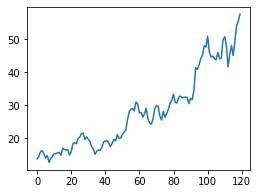

In [63]:
plt.figure(figsize=(4,3)); plt.plot(df_train.timeIndex, df_train.value); plt.show()

La función `adfuller` implementa ADF. Devuelve como resultados:

- p-value. Si es mayor a 5%, $H_0$ no se rechaza, y la serie *no es estacionaria*.
- El valor del estadístico. Si es menor a algunos valores críticos, se considera *estacionaria*.
- Valores críticos.

Se observa un p-value > 0.05 para la serie. Por lo tanto **no es estacionaria**.

In [64]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_train['value']); 
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: 0.515979
p-value: 0.985351
Valor crítico 1%: -3.49
Valor crítico 5%: -2.89
Valor crítico 10%: -2.58


Aplicamos ahora ADF al **residuo** de la serie entre los valores originales y el valor predicho con back transformation.

p-value es menor a 5%, por lo tanto la serie *es estacionaria*.

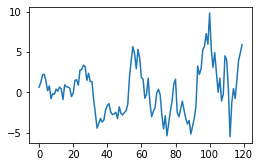

In [65]:
res_model = df_train['value'] - df_train['back_model_log_est']
plt.figure(figsize=(4,2.5)); plt.plot(df_train.timeIndex, res_model, '-');plt.show()

In [66]:
result = adfuller(res_model); print('ADF Statistic: %f' % result[0]); 
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -3.071878
p-value: 0.028706
Valor crítico 1%: -3.49
Valor crítico 5%: -2.89
Valor crítico 10%: -2.58


<div class="div-dhds-fondo-1"> Modelos AR(p) y MA(q)
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Modelo Auto-Regresivo AR(p)

---
El término **autorregresión** indica que es una regresión de la variable contra sí misma.

Pronosticamos la variable usando **una combinación lineal de valores pasados** de la serie.
 
Un **modelo AR(p)**, es un modelo autorregresivo de orden p, que se expresa:

$$ y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + .. + \phi_p y_{t-p} + \epsilon_{t} \\ $$

where $\epsilon_{t}$ es *white noise* (ruido blanco), $y_{t-x}$ los p valores anteriores de la serie.

Los modelos autoregresivos manejan un amplio rango de patrones de series de tiempo.

Veamos qué diferentes son ambos modelos al cambiar los parámetros:

- AR(1) es
$$y_t = 18 - 0.8 y_{t-1} + \epsilon_{t}$$

- AR(2) es  
$$y_t = 8 + 1.3 y_{t-1} - 0.7 y_{t-2} + \epsilon_{t}$$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_006_ar.png" alt="ar" width=70% height=35% align="center"/>

Tenemos casos particulares para AR(1) model: $y_t = c + \phi_1 y_{t-1} + \epsilon_{t}$.

- Si  $\phi_1 = 0$ , entonces $y_t = \epsilon_{t}$. Es **White Noise**.

- Si  $\phi_1 = 1$ y $c=0$, entonces $y_t = y_{t-1} + \epsilon_{t}$. Es **Random Walk**.

- Si  $\phi_1 = 1$ y $c!=0$, entonces $y_t = c + y_{t-1} + \epsilon_{t}$. Es **Random Walk con deriva**.

- Para que cumpla con las condiciones de estacionaridad, se requiere que $ |\phi_1| < 1 $.

### Modelo de Media Movil MA(q)

---
Un modelo de media móvil usa **shocks inobservables presentes y pasados (ruido blanco)** basados en un modelo similar a una regresión.

Un **modelo MA(q)**, es un modelo de media movil de orden q, que se expresa:

$$ y_t = c + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q} $$

donde **$e_{t-x}$ es ruido blanco o rezagos**, y $q$ representa la **cantidad de rezagos o componentes aleatorios** considerados en el modelo. 

Recordemos que el componente aleatorio es la parte de las series de tiempo que *no se explica con la tendencia ni la estacionalidad*.

Los modelos de Media movil también manejan un amplio rango de patrones de series de tiempo.

Veamos las diferencias que se generan cambiando los parámetros:

- MA(1) es
$$y_t = 20 + e_t + 0.8 e_{t-1}$$

- MA(2) es  
$$y_t = e_t - e_{t-1} + 0.8 e_{t-2}$$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M6/CLASE_49_Series_de_Tiempo_2/Presentacion/img/M6_CLASE_49_007_ma.png" alt="ma" width=70% height=35% align="center"/>

*No debe confundirse* el modelo MA(q) con la Media movil (Moving Average o Rolling Mean) que vimos en la clase anterior.

MA(q) lo usamos para pronosticar valores futuros; Media movil para estimar el ciclo de la tendencia en los valores pasados.

<div class="div-dhds-fondo-1"> Modelo ARIMA
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Definición

---
El modelo **ARIMA sin estacionalidad** surge de la combinación de:
* Un modelo Auto-Regresivo AR(p).
* Un modelo de media móvil MA(q).
* Un proceso de Diferenciación con un orden de *Integración*. 

Su denominación es un acrónimo de: **AutoRegressive Integrated Moving Average** model. 

---

El modelo completo se escribe **ARIMA(p,d,q)** donde:

* **Número de términos AR (autorregresivos) (p)**: es el orden p de la parte correspondiente al modelo AR(p).

* **Número de términos MA (promedio móvil) (q)**: es el orden q de la parte correspondiente al modelo MA(q).

* **Número de diferenciaciones (d)**: es el orden de integración del proceso de diferenciación. Si la serie es estacionaria, es igual a cero, ya que no se necesita.

Para determinar el valor de $p$ y $q$, usamos:

* **Plot de la Función de autocorrelación (ACF)**: Como vimos antes, muestra las autocorrelaciones que miden la relación entre $y_t$ y  $y_{t-k}$, para diferentes valores de k.

* **Plot de la Función de autocorrelación parcial (PACF)**: mide la misma relación entre $y_t$ y $y_{t-k}$, pero eliminando los efectos que generan las correlaciones con los valores intermedios $y_{t-x}$, x entre 1 y $k-1$

### Ejemplo

---
Vamos a trabajar con los **residuos** de la última serie calculada, previamente calculados.

Es decir, las diferencias entre el valor original de la serie y los valores predichos por el modelo con back transformation.

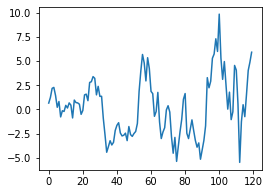

In [67]:
res_model = df_train['value'] - df_train['back_model_log_est']
plt.figure(figsize=(4,3)); plt.plot(df_train.timeIndex, res_model, '-');plt.show()

Recordemos que al aplicarle el test de Dickey-Fuller, **ADF**, vimos que *es estacionaria*.

Lo muestra un p-value menor a 5%.

In [68]:
result = adfuller(res_model)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -3.071878
p-value: 0.028706
Valor crítico 1%: -3.49
Valor crítico 5%: -2.89
Valor crítico 10%: -2.58


### Parámetros p y q

---
Para determinar **los parámetros p y q** necesitamos generar los plot ACF y PACF.

Idealmente, no queremos ninguna correlación entre la serie y los rezagos de sí misma. Viendo los gráficos, deberían caer todos los picos en la región azul.

Los plots son útiles para determinar modelos del tipo **ARIMA(p,d,0) o ARIMA(0,d,q)**.

Para estos casos, la regla a aplicar es:

- La serie sigue un modelo *ARIMA(p,d,0)* si:
    - ACF cae en forma exponencial o sinusoide.
    - PACF tiene un pico importante en el lag p, y ningún otro más alla de lag p, es decir que caen en la región azul.
    
- La serie sigue un modelo *ARIMA(0,d,q)* si sucede lo contrario:
    - PACF cae en forma exponencial o sinusoide.
    - ACF tiene un pico importante en el lag q, y ningún otro más alla de lag q.
    
A veces se complementa con otra regla, donde el cero se reemplaza por los primeros rezagos significativamente mayores a cero. 

Generamos los plot ACF y PACF sobre la serie, con un número de rezagos (lags) suficiente para determinar p y q.

En nuestro ejemplo, *ACF cae en forma exponencial* y *PACF tiene dos picos significativos* .

Por lo tanto asumimos $p = 2$ y $q = 0$. También podemos considerar  $p = 2$ y $q = 2$.

In [69]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

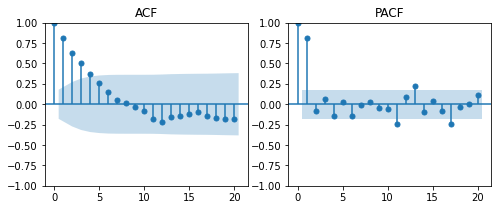

In [70]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
smt.graphics.plot_acf(res_model, lags=20,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(res_model, lags=20,ax=axes[1],title='PACF')
plt.show()

In [71]:
# Crea figura que se muestra cuando explica ACF mas arriba
# fig, axes = plt.subplots(1, 2,figsize=(10,4))
# smt.graphics.plot_acf(df_train['value'], lags=20,ax=axes[0],title='ACF - serie NO estacionaria')
# smt.graphics.plot_acf(res_model, lags=20,ax=axes[1],title='ACF - serie estacionaria')
# plt.savefig('img/M6_CLASE_49_004_acf.png')

### ARIMA

---

In [72]:
# Importamos el modelo ARIMA de statsmodels
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

Instanciamos el modelo con los parámetros determinados en el análisis de ACF y PACF.

- p=2, d=0, q=0. 

$d=0$ porque la serie es estacionaria.

In [73]:
model_ARIMA = sm.tsa.arima.ARIMA(res_model, order=(2,0,2))
#model_ARIMA = ARIMA(res_model, order=(2,0,2))
results_ARIMA = model_ARIMA.fit()

Analizamos los resultados. Entre otros, **AIC y BIC**, indican, a menor valor, mejor modelo.

- AIC - Criterio de Información de Akaike.
- BIC - Criterio de Información Bayesiano (Schwartz).

In [74]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -232.606
Date:                Thu, 02 Jun 2022   AIC                            477.212
Time:                        16:31:25   BIC                            493.937
Sample:                    01-01-2010   HQIC                           484.004
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4372      0.967      0.452      0.651      -1.458       2.333
ar.L1          0.2601      0.388      0.671      0.503      -0.500       1.020
ar.L2          0.4599      0.301      1.528      0.1

### ARIMA

---

Analizamos los residuos del modelo ARIMA que se obtienen con el método `resid()`.

Parecen estar correctos, con la media cercana a cero y una varianza uniforme.

Viendo los plot ACF y PACF, todos los picos caen en la región azul. Mostrando que no existe autocorrelación.

El resíduo ahora es ruido blanco.

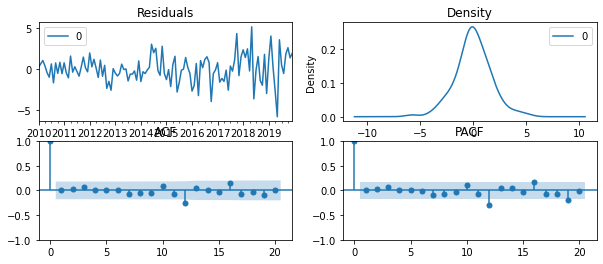

In [75]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2,figsize=(10,4))

residuals.plot(title="Residuals", ax=axes[0,0]); 
residuals.plot(kind='kde', title='Density', ax=axes[0,1])
smt.graphics.plot_acf(residuals, lags=20,ax=axes[1,0],title='ACF'); 
smt.graphics.plot_pacf(residuals, lags=20,ax=axes[1,1],title='PACF')
plt.show()

### ARIMA

---

Como los otros modelos que vimos, hacemos las predicciones con el método `forecast()`.

In [76]:
predictions_ARIMA = results_ARIMA.forecast(len(df_test['value']), alpha=0.05)
display (results_ARIMA.forecast(len(df_test['value']), alpha=0.05))

2020-01-01    5.109987
2020-02-01    4.061346
2020-03-01    3.528726
2020-04-01    2.907954
2020-05-01    2.501554
2020-06-01    2.110376
2020-07-01    1.821739
2020-08-01    1.566773
2020-09-01    1.367720
2020-10-01    1.198696
2020-11-01    1.063194
2020-12-01    0.950221
Freq: MS, Name: predicted_mean, dtype: float64

Sumamos los resultados del modelo ARIMA a los valores originales.

Recordemos que hicimos el modelo sobre los **residuos** de la última serie calculada, previamente calculados: las diferencias entre el valor original de la serie y los valores predichos por el modelo con back transformation.

In [77]:
df_train['model_ARIMA'] = df_train['value'] + results_ARIMA.fittedvalues
df_test['model_ARIMA'] = df_test['value'] + predictions_ARIMA

Comparamos la serie con las estimaciones del modelo, en train y test.

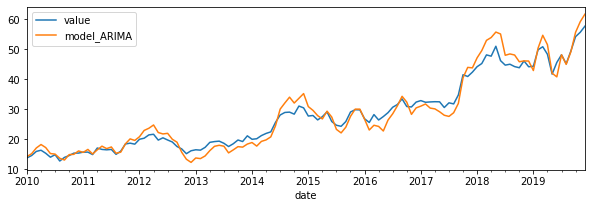

In [78]:
df_train.plot(kind = "line", y = ['value', 'model_ARIMA'],figsize=(10,3));

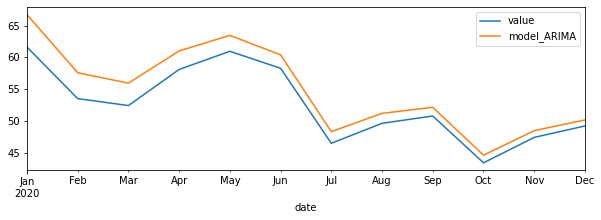

In [79]:
df_test.plot(kind = "line", y = ['value', 'model_ARIMA'],figsize=(10,3));

Comprobamos analíticamente la mejoría que presenta ARIMA respecto al modelo anterior.

In [80]:
df_Results.loc[1, "Model"] = "Log Model + est + ARIMA"
df_Results.loc[1, "RMSE"] = RMSE(df_test['model_ARIMA'], df_test['value'])
df_Results

,Model,RMSE
0,Log Model + est,7.652912
1,Log Model + est + ARIMA,2.666777


<div class="div-dhds-fondo-1"> Conclusiones
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Conclusiones

---

Estuvimos estudiando las series estacionarias, evaluar si lo son y como transformarlas. Necesarias para aplicar el modelo a las series de tiempo.

El modelo ARIMA(p,d,q) se compone de tres modelos:
- Un modelo Auto-Regresivo AR(p)
- Un modelo de Media Movil MA(q)
- Un proceso de diferenciación (d).
      
Vimos como determinar los parámetros p y q.

Y finalmente analizamos algunos resultados de la aplicación del modelo.

ARIMA es un modelo que podemos profundizar en su estudio para desarrollar mejores predicciones.

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

A partir de la serie con los valores de las acciones de General Motors:
- Se genera un modelo de transformacion logaritmica con estacionalidad mensual.
- Y una serie con los residuos: la diferencia entre la serie y los valores predichos.

Sobre esta última serie debe:

1. Aplicar el test de Dickey-Fuller aumentado, ADF, para validar que es estacionaria.
2. Calcular los valores p y q para el modelo ARIMA(p,d,q).
3. Generar el modelo ARIMA y calcular las predicciones.
4. Sumamos los resultados del modelo ARIMA a los valores originales. Graficamos la serie junto con las estimaciones del modelo, en train y test.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Leemos la serie y preparamos las variables.

In [82]:
df = pd.read_csv("../Data/GE.csv", parse_dates=['date'], index_col='date')

In [83]:
# Generamos nuevas variables
df["timeIndex"] = pd.Series(np.arange(len(df['value'])), index=df.index)
df['log_value'] = np.log(df['value'])

df['month'] = [d.strftime('%b') for d in df.index]
dummies_mes = pd.get_dummies(df['month'])
df = df.join(dummies_mes)

In [84]:
print(df.shape)
df.head(3)

(93, 16)


,value,timeIndex,log_value,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2010-01-01,11.433279,0,2.436528,Jan,0,0,0,0,1,0,0,0,0,0,0,0
2010-02-01,11.419061,1,2.435284,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2010-03-01,13.021428,2,2.566596,Mar,0,0,0,0,0,0,0,1,0,0,0,0


Creamos el modelo sobre train, y predecimos el valor (el log de la serie 'model_log_est').

Luego generamos el back transformation 'back_model_log_est', con una función exponencial.

In [85]:
# Dividimos en train y test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=12, random_state=42, shuffle=False)

In [86]:
model_log_est = smf.ols( \
    'log_value ~ timeIndex + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', \
    data = df_train).fit()

In [87]:
df_train['model_log_est'] = model_log_est.predict( \
    df_train[["timeIndex", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])
df_test['model_log_est'] = model_log_est.predict( \
    df_test[["timeIndex", "Aug", "Dec", "Feb", "Jan","Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])

In [88]:
df_train['back_model_log_est'] = np.exp(df_train['model_log_est'])
df_test['back_model_log_est'] = np.exp(df_test['model_log_est'])

Vamos a trabajar con los **residuos** de la última serie calculada, previamente calculados.

Es decir, las diferencias entre el valor original de la serie y los valores predichos por el modelo con back transformation.

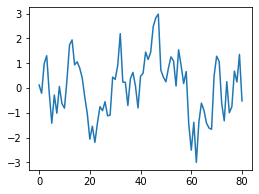

In [89]:
res_model = df_train['value'] - df_train['back_model_log_est']
plt.figure(figsize=(4,3)); plt.plot(df_train.timeIndex, res_model, '-');plt.show()

### Ejercicio 1

----

Aplicar el test de Dickey-Fuller aumentado, ADF, para validar que es estacionaria.

In [90]:
# result = ....
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# for key, value in  result[4].items():
#     print('Valor crítico %s: %.2f' % (key,value))

### Ejercicio 2

----

Calcular los valores p y q para el modelo ARIMA(p,d,q).

In [91]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

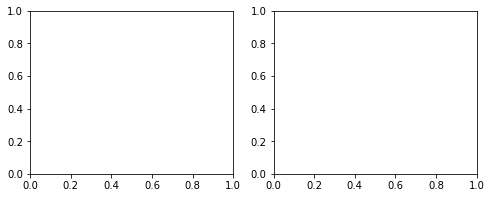

In [92]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
#smt.graphics.plot_acf(....., ....,ax=axes[0],title='ACF')
#smt.graphics.plot_pacf(...., ....,ax=axes[1],title='PACF')
plt.show()

### Ejercicio 3

----

Generar el modelo ARIMA y calcular las predicciones.

In [93]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
#model_ARIMA = ARIMA(....., order=(.,.,.))
#results_ARIMA = model_ARIMA.fit()

In [95]:
#predictions_ARIMA, se, conf = results_ARIMA.forecast(......), alpha=0.05)

### Ejercicio 4

----

Sumamos los resultados del modelo ARIMA a los valores originales. Graficamos la serie junto con las estimaciones del modelo, en train y test.

Recordemos que hicimos el modelo sobre los **residuos** de la última serie calculada, previamente calculados: las diferencias entre el valor original de la serie y los valores predichos por el modelo con back transformation.

In [96]:
#df_train['model_ARIMA'] = df_train['value'] + .....
#df_test['model_ARIMA'] = df_test['value'] + .....

Comparamos la serie con las estimaciones del modelo, en train y test.

In [97]:
#df_train.plot(kind = "line", y = ['...', '....'],figsize=(10,3));

In [98]:
#df_test.plot(kind = "line", y = ['...', '...'],figsize=(10,3));

### Solución

---

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Leemos la serie y preparamos las variables.

In [100]:
df = pd.read_csv("../Data/GE.csv", parse_dates=['date'], index_col='date')

In [101]:
# Generamos nuevas variables
df["timeIndex"] = pd.Series(np.arange(len(df['value'])), index=df.index)
df['log_value'] = np.log(df['value'])

df['month'] = [d.strftime('%b') for d in df.index]
dummies_mes = pd.get_dummies(df['month'])
df = df.join(dummies_mes)

In [102]:
print(df.shape)
df.head(3)

(93, 16)


,value,timeIndex,log_value,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2010-01-01,11.433279,0,2.436528,Jan,0,0,0,0,1,0,0,0,0,0,0,0
2010-02-01,11.419061,1,2.435284,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2010-03-01,13.021428,2,2.566596,Mar,0,0,0,0,0,0,0,1,0,0,0,0


Creamos el modelo sobre train, y predecimos el valor (el log de la serie 'model_log_est').

Luego generamos el back transformation 'back_model_log_est', con una función exponencial.

In [103]:
# Dividimos en train y test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=12, random_state=42, shuffle=False)

In [104]:
model_log_est = smf.ols( \
    'log_value ~ timeIndex + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep',\
                          data = df_train).fit()

In [105]:
df_train['model_log_est'] = model_log_est.predict( \
    df_train[["timeIndex", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])
df_test['model_log_est'] = model_log_est.predict( \
    df_test[["timeIndex", "Aug", "Dec", "Feb", "Jan","Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep"]])

In [106]:
df_train['back_model_log_est'] = np.exp(df_train['model_log_est'])
df_test['back_model_log_est'] = np.exp(df_test['model_log_est'])

Vamos a trabajar con los **residuos** de la última serie calculada, previamente calculados.

Es decir, las diferencias entre el valor original de la serie y los valores predichos por el modelo con back transformation.

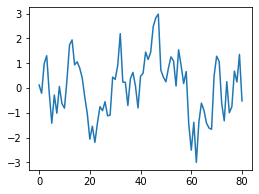

In [107]:
res_model = df_train['value'] - df_train['back_model_log_est']
plt.figure(figsize=(4,3)); plt.plot(df_train.timeIndex, res_model, '-');plt.show()

### Ejercicio 1

----

Aplicar el test de Dickey-Fuller aumentado, ADF, para validar que es estacionaria.

Muestra un p-value menor a 5%, por lo tanto es estacionaria. La podemos usar para el modelo ARIMA.

In [108]:
result = adfuller(res_model)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -3.827876
p-value: 0.002635
Valor crítico 1%: -3.51
Valor crítico 5%: -2.90
Valor crítico 10%: -2.59


### Ejercicio 2

----

Calcular los valores p y q para el modelo ARIMA(p,d,q).

Generamos los plot ACF y PACF sobre la serie, con 20 rezagos (lags).

En nuestro ejemplo, *ACF cae en forma exponencial* y *PACF tiene dos picos significativos* .

Por lo tanto asumimos $p = 2$ y $q = 0$. También podriamos considerar  $p = 2$ y $q = 2$ y chequear cual tiene mejor performance.

In [109]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

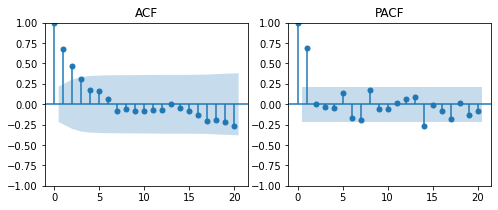

In [110]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
smt.graphics.plot_acf(res_model, lags=20,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(res_model, lags=20,ax=axes[1],title='PACF')
plt.show()

### Ejercicio 3

----

Generar el modelo ARIMA y calcular las predicciones.

Instanciamos el modelo con los parámetros determinados en el análisis de ACF y PACF.

- p=2, d=0, q=0. 

$d=0$ porque la serie es estacionaria.

Hacemos las predicciones con el método `forecast()`.

In [111]:
from statsmodels.tsa.arima_model import ARIMA

In [112]:
model_ARIMA = ARIMA(res_model, order=(2,0,0))
results_ARIMA = model_ARIMA.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
predictions_ARIMA, se, conf = results_ARIMA.forecast(len(df_test['value']), alpha=0.05)

### Ejercicio 4

----

Sumamos los resultados del modelo ARIMA a los valores originales. Graficamos la serie junto con las estimaciones del modelo, en train y test.

Recordemos que hicimos el modelo sobre los **residuos** de la última serie calculada, previamente calculados: las diferencias entre el valor original de la serie y los valores predichos por el modelo con back transformation.

In [ ]:
df_train['model_ARIMA'] = df_train['value'] + results_ARIMA.fittedvalues
df_test['model_ARIMA'] = df_test['value'] + predictions_ARIMA

Comparamos la serie con las estimaciones del modelo, en train y test.

In [ ]:
df_train.plot(kind = "line", y = ['value', 'model_ARIMA'],figsize=(10,3));

In [ ]:
df_test.plot(kind = "line", y = ['value', 'model_ARIMA'],figsize=(10,3));

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://www.statsmodels.org/stable/index.html" target="_blank">statmodels</a>

<a href="https://pandas.pydata.org/pandas-docs/version/0.23/timeseries.html" target="_blank">Pandas - Time Series / Date functionality</a>

<a href="https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322" target="_blank">Stationarity in time series analysis</a>

<a href="https://otexts.com/fpp2/stationarity.html" target="_blank">Forecasting: Principles and Practice - Estacionaridad</a>

<a href="https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3" target="_blank">Pandas resample() tricks you should know for manipulating time-series data</a>

<a href="https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788" target="_blank">Time Series in Python — Exponential Smoothing and ARIMA processes</a>

<a href="https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/" target="_blank">Time Series Forecasting Methods</a>

<a href="https://towardsdatascience.com/moving-averages-in-python-16170e20f6c" target="_blank">Moving averages with Python</a>

<a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/" target="_blank">Augmented Dickey Fuller Test</a>

<a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/" target="_blank">ARIMA Model – Complete Guide to Time Series Forecasting in Python</a>